# <mark>**Importing the requried pakages**<mark>

---







In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D ,Dense,Dropout,MaxPool2D ,Flatten
from tensorflow.keras.optimizers import Adam

%matplotlib inline

# <mark>**Giving the Classes names**<mark>

---



In [2]:
className = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# <mark>Loading the Dataset<mark>

In [3]:
(x_train , y_train),(x_test , y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


# <mark>**Normalization of the images**<mark> 

In [4]:
x_train = x_train /255.0
x_test = x_test / 255.0

# <mark>Showing the Shape<mark>

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape 

(10000, 32, 32, 3)

# <mark>Showing a picture from the dataset<mark>

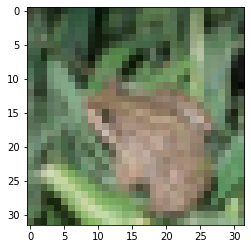

In [7]:
plt.imshow(x_test[4])

# <mark>Model defining<mark>

In [8]:
model = tf.keras.models.Sequential()

## <mark>***Adding the first cnn layer***<mark>

### **<mark>Conv2D is the layer of keras  in which the weights are assigned to input and from which a feature map is generated<mark>**



---






* Filters are used to extract features from images 
in the process of convolution.

---

* kernal_size specifies the width and hieght of the Convultion

---




*   padding="same" mean the size of input and output will be same

---


*  activation="relu" Using Rectified linear unit as activation function

---







*   Input_shape specifies the shape of the input of the tensor








In [9]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3 , padding="same" , activation="relu" , input_shape=[32,32,3]))

# <mark>**Adding the second  cnn layer**<mark>

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , padding="same" , activation="relu"))

## <mark>***Adding the maxpooling layer***<mark>

Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

---

---





In [11]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2 , padding="valid"))

# <mark>Adding the third cnn layer<mark>




In [12]:
model.add(tf.keras.layers.Conv2D(filters=64 ,kernel_size=3 , padding ="same" , activation="relu"))

# <mark>Adding the fourth cnn layer<mark>


In [13]:
model.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , padding="same", activation="relu"))

## <mark>***Adding the maxpool***<mark> 


In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

## <mark>***Adding the Flatten layer***<mark> 


Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer. Dense adds the fully connected layer to the neural network

---

---










In [15]:
model.add(tf.keras.layers.Flatten())

#  <mark> Adding the Dense Layer <mark>

Each neuron in a layer receives an input from all the neurons present in the previous layer—thus, they're densely connected. In other words, the dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.

---

---

---
units mean number of neuran







In [16]:
model.add(tf.keras.layers.Dense(units=64, kernel_initializer='he_uniform',activation="relu"))

model.add(tf.keras.layers.Dense(units=128, kernel_initializer='he_uniform',activation="relu"))



#  <mark> Adding the Dense Layer <mark>

In [17]:
model.add(tf.keras.layers.Dense(units=10  ,kernel_initializer='glorot_uniform',activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# <mark>**Compililation of the model**<mark>

In [19]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss= "sparse_categorical_crossentropy", optimizer=opt, metrics=["sparse_categorical_accuracy"])

# <mark>**Model fitting**<mark>

In [20]:
model.fit(x_train,y_train , epochs=30)

Epoch 1/30
1563/1563 [==============================] - 39s 4ms/step - loss: 1.6918 - sparse_categorical_accuracy: 0.3724
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9958 - sparse_categorical_accuracy: 0.6453
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7932 - sparse_categorical_accuracy: 0.7191
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6560 - sparse_categorical_accuracy: 0.7727
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5585 - sparse_categorical_accuracy: 0.8044
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4759 - sparse_categorical_accuracy: 0.8311
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4103 - sparse_categorical_accuracy: 0.8560
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3346 - sparse_categorical_accuracy: 0.8830
Epoch 9/30
1563/1563 [=========

In [21]:
test_lose , test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8751 - sparse_categorical_accuracy: 0.7189


### <mark>**The accuracy for this dataset is good when its higher than 70**<mark>